# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [3]:
print (mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
print (study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
#combine the data into single DataFrame 
df = pd.merge (study_results, mouse_metadata, on = "Mouse ID")

#display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [7]:
# Checking the number of mice.
df["Mouse ID"].nunique ()

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values()

Mouse ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [9]:
# Optional: Get all the data for the duplicate mouse ID.
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"]!= "g989"
df2 = df.loc[mask].reset_index(drop=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [11]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Calculate each statistic separately
mean_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().reset_index(name='Mean Tumor Volume')
median_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().reset_index(name='Median Tumor Volume')
variance_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().reset_index(name='Variance')
std_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().reset_index(name='Standard Deviation')
sem_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(lambda x: x.std() / (len(x) ** 0.5)).reset_index(name='SEM')

# Merge all the statistics into a single DataFrame
summary_stats = mean_tumor.merge(median_tumor, on='Drug Regimen') \
                           .merge(variance_tumor, on='Drug Regimen') \
                           .merge(std_tumor, on='Drug Regimen') \
                           .merge(sem_tumor, on='Drug Regimen')

# Merge all the statistics into a single DataFrame
summary_stats = mean_tumor.merge(median_tumor, on='Drug Regimen') \
                           .merge(variance_tumor, on='Drug Regimen') \
                           .merge(std_tumor, on='Drug Regimen') \
                           .merge(sem_tumor, on='Drug Regimen')

print(summary_stats)


  Drug Regimen  Mean Tumor Volume  Median Tumor Volume   Variance  \
0    Capomulin          40.675741            41.557809  24.947764   
1     Ceftamin          52.591172            51.776157  39.290177   
2    Infubinol          52.884795            51.820584  43.128684   
3     Ketapril          55.235638            53.698743  68.553577   
4     Naftisol          54.331565            52.509285  66.173479   
5      Placebo          54.033581            52.288934  61.168083   
6     Propriva          52.320930            50.446266  43.852013   
7     Ramicane          40.216745            40.673236  23.486704   
8     Stelasyn          54.233149            52.431737  59.450562   
9    Zoniferol          53.236507            51.818479  48.533355   

   Standard Deviation       SEM  
0            4.994774  0.329346  
1            6.268188  0.469821  
2            6.567243  0.492236  
3            8.279709  0.603860  
4            8.134708  0.596466  
5            7.821003  0.581331  
6 

In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

df2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

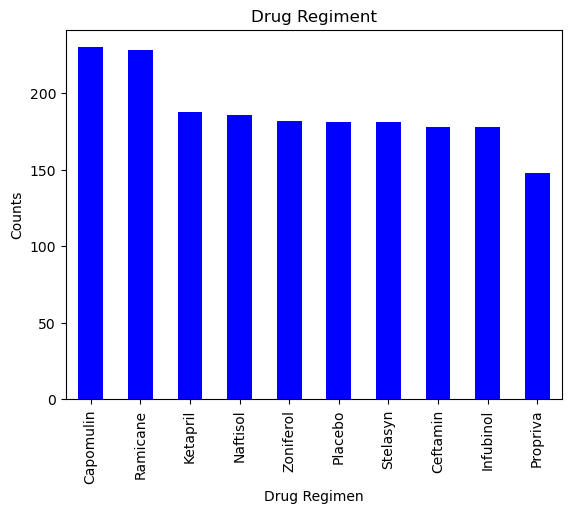

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df2.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar", title = "Drug Regiment", ylabel = "Counts", color = "Blue")
plt.show()

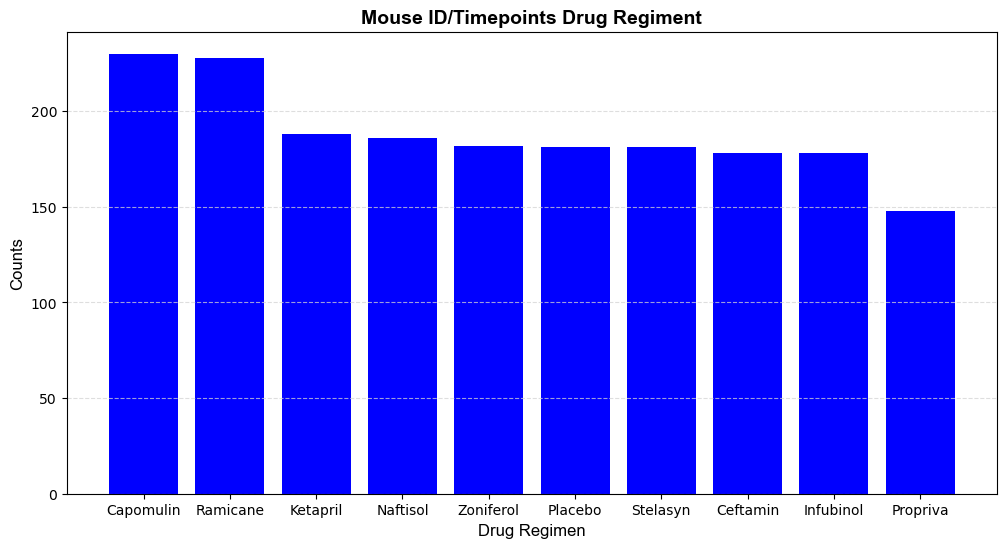

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#data Viz Recipe 
data = df2.groupby("Drug Regimen").size().sort_values(ascending=False)

#Canvas size 
plt.figure (figsize = (12, 6))

#create a basic plot 
plt.bar(data.index, data.values, color = "Blue", align = "center")

#add labels/title
plt.xlabel ("Drug Regimen", fontfamily= "Arial", fontsize= 12)
plt.ylabel ("Counts", fontfamily= "Arial", fontsize= 12)
plt.title ("Mouse ID/Timepoints Drug Regiment", fontweight="bold", fontsize= 14, fontfamily= "Arial")

#Background grid 
plt.grid(axis="y", linestyle="--", color="lightgray", alpha=0.75)

#show graph 
plt.show()

In [16]:
# Get the unique mice with their gender
gender_counts = df2[["Mouse ID", "Sex"]].drop_duplicates()
gender_counts

,Mouse ID,Sex
0,b128,Female
1,f932,Male
2,g107,Female
3,a457,Female
4,c819,Male
...,...,...
243,t565,Female
244,i557,Female
245,m957,Female
246,f966,Male


In [17]:
# Count the number of unique mice for each gender
gender_distribution = gender_counts['Sex'].value_counts()
gender_distribution

Sex
Male      125
Female    123
Name: count, dtype: int64

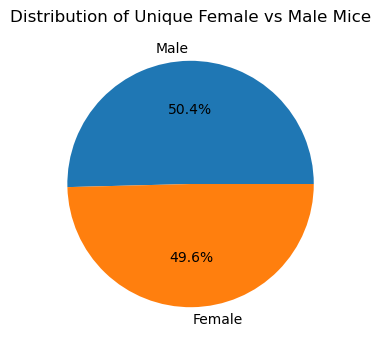

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Make the pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 4), title='Distribution of Unique Female vs Male Mice')
plt.ylabel('')  # Optional: Hide the y-label for better aesthetics
plt.show()

In [19]:
#male 
125/248

0.5040322580645161

In [20]:
#female 
123/248

0.4959677419354839

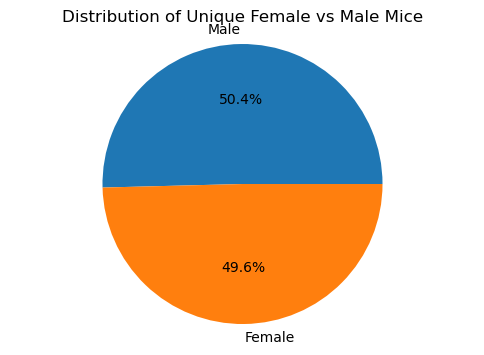

In [21]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

gender_distribution = gender_counts['Sex'].value_counts()
gender_distribution

# Make the pie chart
plt.figure(figsize=(6, 4))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Unique Female vs Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = df2.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df3 = pd.merge(max_time, df2, on=["Mouse ID", "Timepoint"],how="left")
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = df3["Drug Regimen"].isin(drugs) 
df3 = df3.loc[mask].reset_index(drop=True)
df3

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor volume data (for plotting)
tumor_volumes = []

# Loop through each treatment to calculate IQR and determine potential outliers
for treatment in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = df3.loc[df3["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # Add subset to the tumor_volumes list
    tumor_volumes.append(tumor_data)

    # Calculate the IQR
    Q1 = tumor_data.quantile(0.25)
    Q3 = tumor_data.quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print the results
    print(f"{treatment} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Capomulin - Lower Bound: 20.70456164999999, Upper Bound: 51.83201549
Ramicane - Lower Bound: 17.912664470000003, Upper Bound: 54.30681135
Infubinol - Lower Bound: 36.83290494999999, Upper Bound: 82.74144559000001
Ceftamin - Lower Bound: 25.355449580000002, Upper Bound: 87.66645829999999


/var/folders/1z/ktpxv7kx1hj6s3h9sw04p4_w0000gn/T/ipykernel_2513/277413043.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volumes, labels=drugs, boxprops=dict(color='blue'))


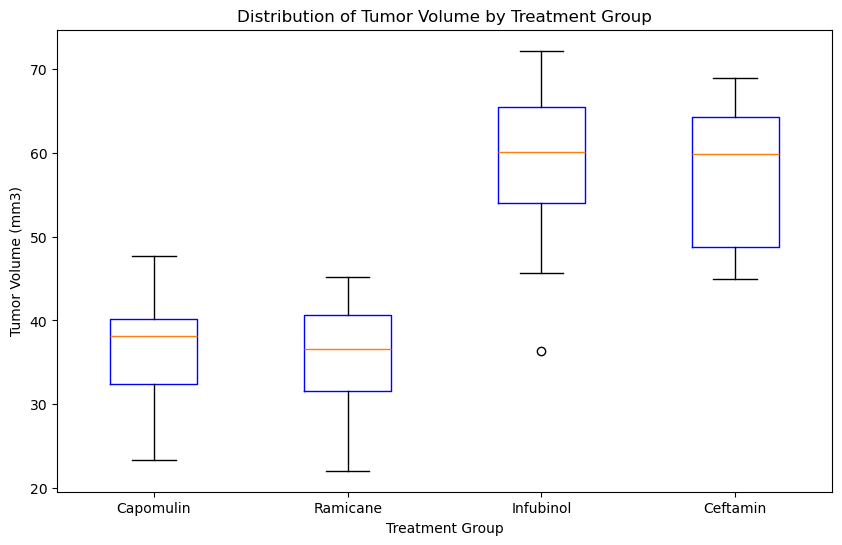

In [31]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=drugs, boxprops=dict(color='blue'))

# Add titles and labels
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

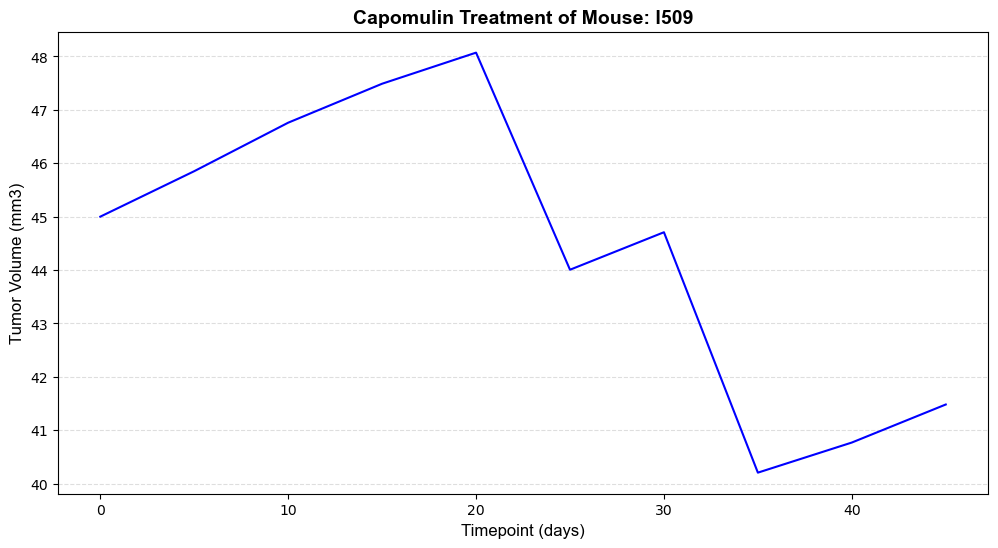

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "l509"

df4 = df2.loc[df2["Mouse ID"] == mouse].sort_values(by = "Timepoint", ascending=True)

#figure size 
plt.figure(figsize=(12,6))

#line plot 
plt.plot(df4.Timepoint, df4["Tumor Volume (mm3)"], color="blue")

#add labels/title
plt.xlabel ("Timepoint (days)", fontfamily= "Arial", fontsize= 12)
plt.ylabel ("Tumor Volume (mm3)", fontfamily= "Arial", fontsize= 12)
plt.title (f"Capomulin Treatment of Mouse: {mouse}", fontweight="bold", fontsize= 14, fontfamily="Arial")

#Background grid 
plt.grid(axis="y", linestyle="--", color="lightgray", alpha=0.75)

#show graph 
plt.show()


In [44]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
regimen = "Capomulin"

df5= df2.loc[df2["Drug Regimen"] == regimen]
df6 = df5.groupby("Mouse ID").agg({"Tumor Volume (mm3)" : "mean", "Weight (g)" : "mean"}).reset_index()
df6.head()

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0


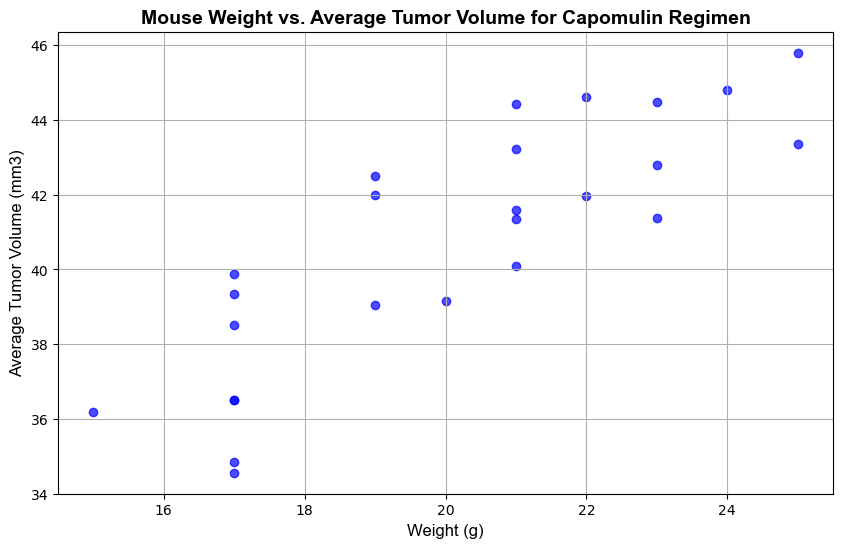

In [45]:
# Generate a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df6["Weight (g)"], df6["Tumor Volume (mm3)"], color="blue", alpha=0.7)

# Add labels and title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen", fontweight="bold", fontsize=14, fontfamily="Arial")

# Show grid
plt.grid(True)

# Show plot
plt.show()

## Correlation and Regression

In [46]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = df6["Weight (g)"]
y_values = df6["Tumor Volume (mm3)"]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = st.linregress(x_values, y_values)

# Create a linear regression line
regression_line = slope * x_values + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
print (line_eq)


y=0.95x +21.55


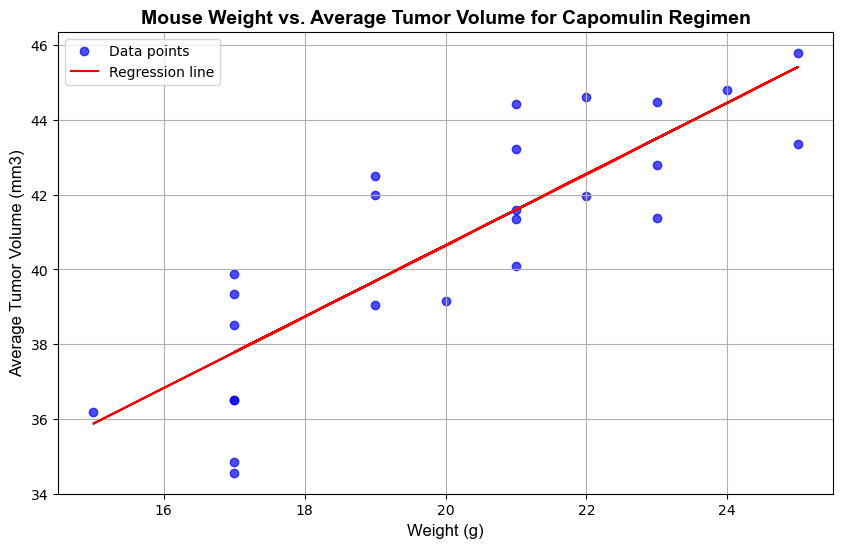

In [47]:
# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(df6["Weight (g)"], df6["Tumor Volume (mm3)"], color="blue", alpha=0.7, label="Data points")
plt.plot(df6["Weight (g)"], regression_line, color="red", label="Regression line")

# Add labels and title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen", fontweight="bold", fontsize=14, fontfamily="Arial")
plt.legend()

# Show grid
plt.grid(True)

# Show plot
plt.show()